## 1.2 ARMA vs. ARIMA Models for Financial Applications

An autoregressive-moving-average process, ARMA$(p, q)$, is a stochastic process $\{x[t]\}$, composed of both
* An AR part that regresses the variable $x[t]$ on its own lagged values, i.e.  $ x[t-1], \cdots, x[t-p].$
* An MA part which models the error term as a linear combination of error terms at various times in the past, i.e. $\eta[t-1], \cdots, \eta[t-q].$

The ARMA$(p,q)$ model takes the form,

\begin{equation} \label{eq:7}
    x[t] = \sum_{i=1}^p a_i x[t-i] + \sum_{i=1}^q b_i \eta[t-i] + \eta[t].
\end{equation}

The ARMA models are widely used in finance, as
* The AR$(p)$, i.e. the autoregressive component aims to explain the momentum and mean reversion effects often observed in trading markets. These can be thought of as the effects due to the participants.
* The MA$(q)$ component, i.e. the moving average, attempts to capture, in signal processing terms, the shock effects observed as white noise. In finance, these shock effects can be though of as unexpected events which affect the observation process, e.g. wars, news, etc.

All ARMA models assume stationarity of data. This means that when sources of non-stationarity are present (i.e. a trend), the ARMA model in its original form may not be particularly suitable for analysis.


In [1]:
# Import libraries
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.ar_model import AR

import copy

# Set path for generated figures
fig_path = './figures_1.2/'

<a id='1.2.1'></a>
### 1.2.1 Suitability of ARMA and ARIMA Models

In the figure below, we have the historical close prices of S\&P 500 together with its rolling mean and standard deviation. Upon viewing the plots, it is easy to notice an upward trend in the prices, so the signal is not stationary. Although, note that the rolling $\sigma$ signal can be considered to be somewhat stationary.

In [2]:
# Read S&P 500 data
mydateparser = lambda x: datetime.strptime(x, '%Y-%m-%d')
snp = pd.read_csv('snp_500_2015_2019.csv', index_col='Date', parse_dates=True, date_parser=mydateparser)
snp_close = snp['Close'].to_frame().apply(np.log)

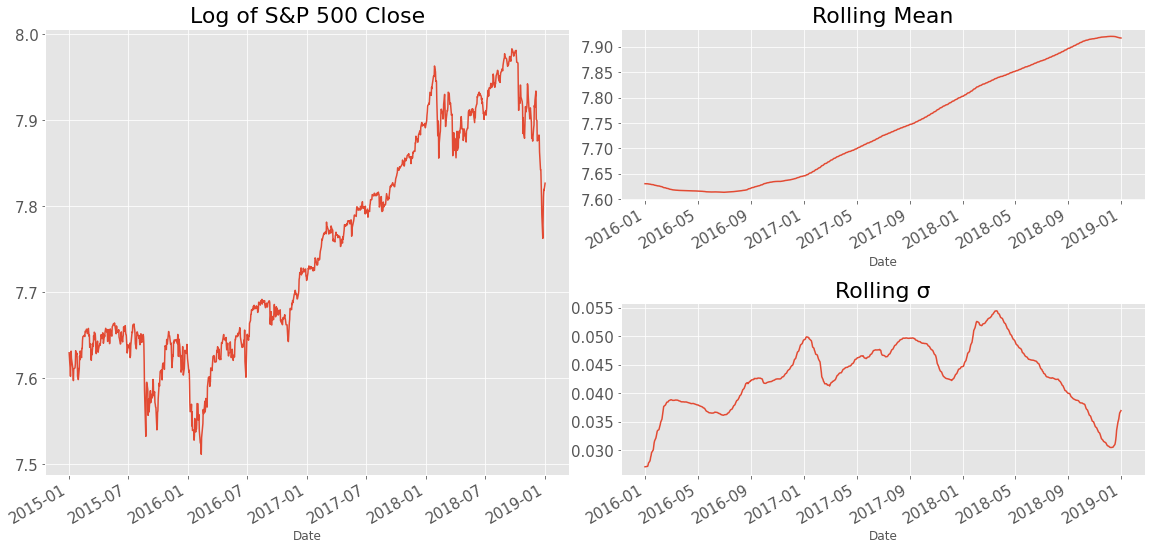

In [3]:
window = 252

fig, axes = plt.subplots(2,2, figsize=(16,8))

axes[0,0].remove()
axes[1,0].remove()
ax_left = fig.add_subplot(2,2,(1,3))
fig.tight_layout()
fig.subplots_adjust(hspace=0.6, wspace=0.1)

snp_close.plot(ax=ax_left, fontsize=15, legend=None); ax_left.set_title("Log of S&P 500 Close", fontsize=22)
snp_close.rolling(window).mean().plot(ax=axes[0,1], fontsize=15, legend=None); axes[0,1].set_title("Rolling Mean", fontsize=22)
snp_close.rolling(window).std().plot(ax=axes[1,1], fontsize=15, legend=None); axes[1,1].set_title("Rolling \u03C3", fontsize=22)

fig.savefig(fig_path+'SP_Close_and_stats.eps', dpi=200, bbox_inches='tight')

As mentioned in the introduction of this section, since all ARMA models assume stationarity in the signal, it wouldn't be appropriate to use an ARMA model to model the S\&P 500 Close prices. Instead, it would be better practice to use an ARIMA model, which accounts for this nonstationarity by applying a differencing operation.

<a id='1.2.2'></a>
### 1.2.2 Fitting an ARMA model

We use an ARIMA(1,0,0) model (i.e. an AR(1) model) to predict the S\&P 500 close prices. Then using the prevous equation given for ARMA models, this model can be represented as

\begin{equation}
     x[t] = a_1 x[t-1] + \eta[t],
\end{equation}

where $a_1$ is determined to be 0.997359. The plot of the predictions together with the true value of the S\&P close prices is given in the figure below.

In [4]:
snp_arma = copy.deepcopy(snp_close)
snp_arma.columns = ['True']

In [5]:
# model summary
print(ARIMA(snp_arma['True'], order=(1,0,0)).fit().summary())

                              ARMA Model Results                              
Dep. Variable:                   True   No. Observations:                 1006
Model:                     ARMA(1, 0)   Log Likelihood                3352.702
Method:                       css-mle   S.D. of innovations              0.009
Date:                Sun, 11 Apr 2021   AIC                          -6699.405
Time:                        19:54:17   BIC                          -6684.664
Sample:                             0   HQIC                         -6693.804
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7400      0.078     99.461      0.000       7.587       7.893
ar.L1.True     0.9974      0.002    530.472      0.000       0.994       1.001
                                    Roots           

/Users/atayardimci/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [6]:
snp_arma['Res'] = ARIMA(snp_arma['True'], order=(1,0,0)).fit().resid
snp_arma['Prediction'] = snp_arma['True'] - snp_arma['Res']

/Users/atayardimci/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


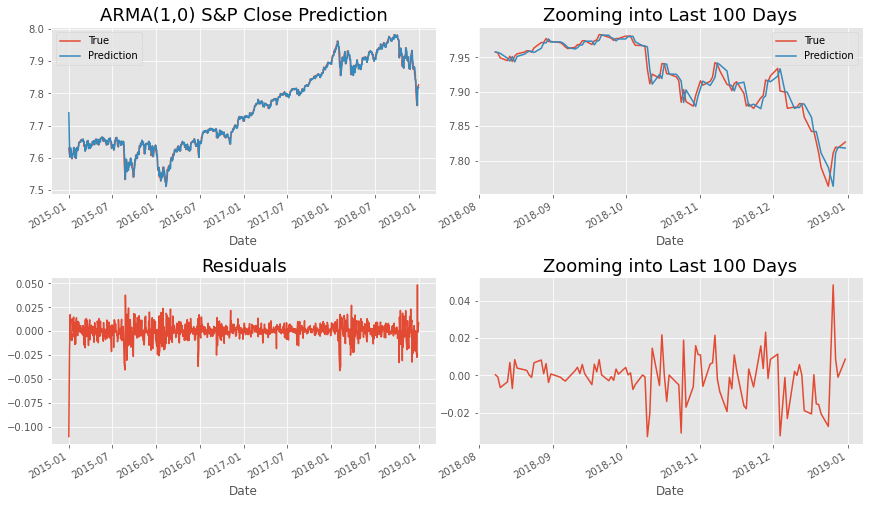

In [7]:
fig, axes = plt.subplots(2,2, figsize=(12,7.5))
fig.tight_layout()
fig.subplots_adjust(hspace=0.5)

snp_arma[['True', 'Prediction']].plot(ax=axes[0,0]); axes[0,0].set_title("ARMA(1,0) S&P Close Prediction", fontsize=18)
snp_arma[['True', 'Prediction']][-100:].plot(ax=axes[0,1]); axes[0,1].set_title("Zooming into Last 100 Days", fontsize=18)

snp_arma['Res'].plot(ax=axes[1,0]); axes[1,0].set_title("Residuals", fontsize=18)
snp_arma['Res'][-100:].plot(ax=axes[1,1]); axes[1,1].set_title("Zooming into Last 100 Days", fontsize=18)

fig.savefig(fig_path+'ARMA_prediction.eps', dpi=200, bbox_inches='tight')

In [8]:
ARMA_mae = abs(snp_arma['Res']).mean()
print('ARMA Mean Absolute Error: ', ARMA_mae)

ARMA Mean Absolute Error:  0.00597446671981324


It is often assumed that financial time series are martingale processes, that it the conditional expectation of the next value in the sequence is equal to the present value, regardless of all prior values. Since an AR(1) model only depends on the present value to determine the next value, it is suitable for use on this occasion in terms of modelling a martingale process.

We can see in the figure above that this model fits the series quite well with a mean absolute error of 0.00597. In the zoomed plot, we can see that the prediction is a lagged version of the true signal, which is expected of a martingale process.

Because the signal is upward trending and an average value for the signal is used to predict the very first data point, we observe a high residual at the beginning. Also, since this model doesn't account for the shock effects in the signal, due to the lack of an MA part, the residuals increase at points where we can observe these effects.

Finally, because the given AR(1) model assumes the signal to be purely martingale without accounting for the shock effects in the market, it digresses from the reality. The prediction can be basically viewed as a one time step lagged version of the true signal, which is not that useful in practice. Finally, this model does not account for the non-stationarity in the signal, and we will look into this in the next section.

<a id='1.2.3'></a>
### 1.2.3 Fitting an ARIMA model

In section [1.2.2](#1.2.2), we mentioned that the ARMA models assume stationarity and are not suitable for non-stationary signals. In this section, we use an ARIMA(1,1,0) model, which accounts for the non-stationarity in the signal, to fit the S\&P 500 close price time series.

An ARIMA$(p, d, q)$ model is essentially the same as an ARMA model, with the exception that it applies an initial differencing on the time-series to remove elements of non-stationarity, where d is the differencing order. We adjust the previous equation, which was for ARMA, as

\begin{equation} \label{eq:9}
    y[t] = \sum_{i=1}^p a_i y[t-i] + \sum_{i=1}^q b_i\eta[t-i] + \eta[t].
\end{equation}

where $y[t]$ is the $d$-th difference of $x[t]$, e.g.:
* If $d=0: y[t] = x[t]$
* If $d=1: y[t] = x[t] - x[t-1]$
* If $d=2: y[t] = (x[t] - x[t-1]) - (x[t-1] - x[t-2]) = x[t] - 2x[t-1] + x[t-2]$

Since we have concluded that we have a positive trend in the S\&P 500 close price data making the signal non-stationary, it is more appropriate to use an ARIMA model instead of an ARMA. We use an ARIMA(1,1,0) model, and the equation becomes

\begin{equation}
     y[t] = a_1 y[t-1] + \eta[t],
\end{equation}

where $a_1$ is determined to be -0.0088. The plot of the predictions together with the true value of the S\&P close prices is given in the figure below.

In [9]:
snp_arima = copy.deepcopy(snp_close)
snp_arima.columns = ['True']

In [10]:
# model summary
print(ARIMA(snp_arima['True'], order=(1,1,0)).fit().summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.True   No. Observations:                 1005
Model:                 ARIMA(1, 1, 0)   Log Likelihood                3351.549
Method:                       css-mle   S.D. of innovations              0.009
Date:                Sun, 11 Apr 2021   AIC                          -6697.099
Time:                        19:54:18   BIC                          -6682.361
Sample:                             1   HQIC                         -6691.499
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0002      0.000      0.728      0.466      -0.000       0.001
ar.L1.D.True    -0.0088      0.032     -0.277      0.782      -0.071       0.053
                                    Roots   

/Users/atayardimci/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/atayardimci/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


In [11]:
snp_arima['Res'] = ARIMA(snp_arima['True'], order=(1,1,0)).fit().resid
snp_arima['Prediction'] = snp_arima['True'] - snp_arima['Res']

/Users/atayardimci/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/atayardimci/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


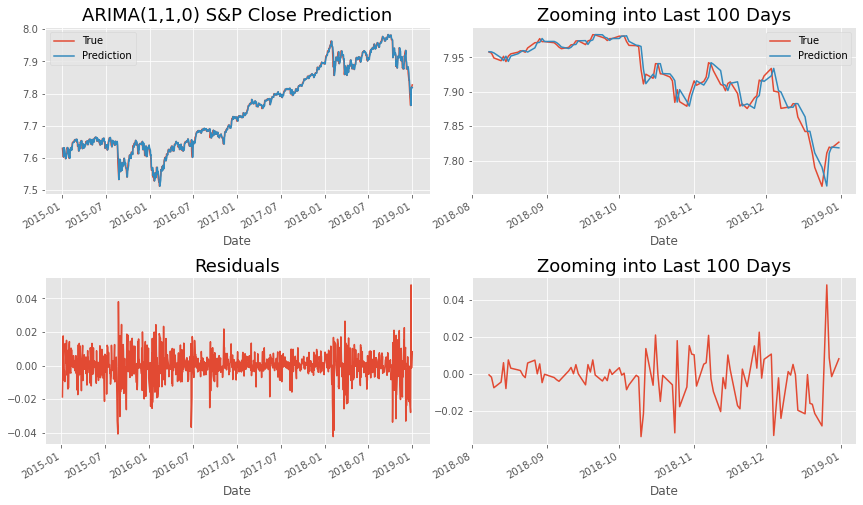

In [12]:
fig, axes = plt.subplots(2,2, figsize=(12,7.5))
fig.tight_layout()
fig.subplots_adjust(hspace=0.5)


snp_arima[['True', 'Prediction']].plot(ax=axes[0,0]); axes[0,0].set_title("ARIMA(1,1,0) S&P Close Prediction", fontsize=18)
snp_arima[['True', 'Prediction']][-100:].plot(ax=axes[0,1]); axes[0,1].set_title("Zooming into Last 100 Days", fontsize=18)

snp_arima['Res'].plot(ax=axes[1,0]); axes[1,0].set_title("Residuals", fontsize=18)
snp_arima['Res'][-100:].plot(ax=axes[1,1]); axes[1,1].set_title("Zooming into Last 100 Days", fontsize=18)


fig.savefig(fig_path+'ARIMA_prediction.eps', dpi=200, bbox_inches='tight')

In [13]:
ARIMA_mae = abs(snp_arima['Res']).mean()
print('ARIMA Mean Absolute Error: ', ARIMA_mae)

ARIMA Mean Absolute Error:  0.0058479270962386995


In [14]:
error_improvement = (ARIMA_mae - ARMA_mae)/ ARMA_mae
print("The error from ARMA has decreased by %.2f%%."%(error_improvement * -100))

The error from ARMA has decreased by 2.12%.


The plots are very similar to those of the AR(1) model in section [1.2.2](#1.2.2), though we observe a slight improvement of 2\% in the mean absolute error. The AR coefficient, -0.0088, is very close to zero, indicating there is little correlation between successive returns (see section [1.2.4](#1.2.4) for link to returns) and that the model is not very suitable for practical purposes. Furthermore, similar to AR(1), this model also doesn't account for shock effects due to the lack of an MA part.

This ARIMA model, with an integrating order of 1, takes the difference between successive log-prices and applies an ARMA to these differences. Because these values represent log-returns (see section [1.2.4](#1.2.4)), they are normally distributed and are stationary, as we discussed in previous sections. Because applying an ARMA model to a stationary signal is more appropriate, this analysis is more meaningful. Also the consideration of returns makes this analysis comparable to other assets.

<a id='1.2.4'></a>
### 1.2.4 Necessity of taking the log for ARIMA

We have mentioned the time additivity of log returns in previous sections. When we use an ARIMA(1,1,0) model in [1.2.3](#1.2.3) for log-price prediction, we basically use log-returns (instead of log-price) in an ARMA(1,0) model since $y[t] = x[t] - x[t-1]$, and we know

\begin{equation*}
    \ln(p_t) - \ln(p_{t-1}) = \ln \left( \frac{p_t}{p_{t-1}} \right) = r_t.
\end{equation*}

We also know, from previous sections, that log-return data is stationary and is suitable for use in an ARMA model. This is a good example on how and why ARIMA models can be used for nonstationary data. Because of this thought process, it is necessary to use log-prices instead of the original price data.